# Preprocessing: 

### Variables removed include: "In literature", "Compound, "A", "B", "v(B)", "R(BVI)(Å)"
- In literature these were removed as they have no correlation to the "Lowest distortion" column.
- Valence of B: omitted because it provides no new information, since V(A) gives the same information due to their physical relation.
- R(BVI)(Å) omitted because it is highly proportional to the octahedral factor, hence no new information obtained.
- Compound, A, B, v(B) and R(BVI)(Å) were removed as literature shows lack of effect on predicated data.
- **Intial number of data points: 5329**

### Removal of data values:
- NaN removed - Lowest distortion cannot be averaged **Removed: 53**
- NaN removed - "τ" was not be averaged as values ranged from 0 to 10, and as too many data entries had NaN value to make an accurate  average. **Removed: 3090**
- V(A) equal to 4 or 5 were removed as due to perovskite chemical compositional rules.

### Based on literature and Year 1 Lectures:
- Removal of τ > 4.18  **Removed:335**
- Removal of tG < 0.82 as these values are unrealistic for a perovskite composition **Removed:1242**
- **Final number of data points: 609**

### Encoding (One-hot encoding):
- One-hot encoding was initially used to seperate V(A) into V(A) = 1,2,3.
- However, it was realised that the encoding should be used on categorical data. 
- The only categorical data kept after preprocessing was the "Lowest distortion" column, which is used for y-values. However, it was rejected for this particular problem since the encoding would only be performed on y-values so it offers no benefit. 

### MinMaxScaling:
- Used for  "V(A)", "r(AXII)(Å)","r(AVI)(Å)","EN(A)","EN(B)","l(A-O)(Å)","l(B-O)(Å)","ΔENR", "tG","τ","μ". 
- Ensures that all our data is between 0-1, and helps compare heterogeneous data.

### Training and Test set:
- 60:40 training to test split. 

# Classification: 

### Pair Plot:

- For all our 13 of them, each feature is plotted against eachother for all permutations, and displayed in a 13 x 13 grid of scatter plots. This helps us infer relations between the class and two of the featrures. 

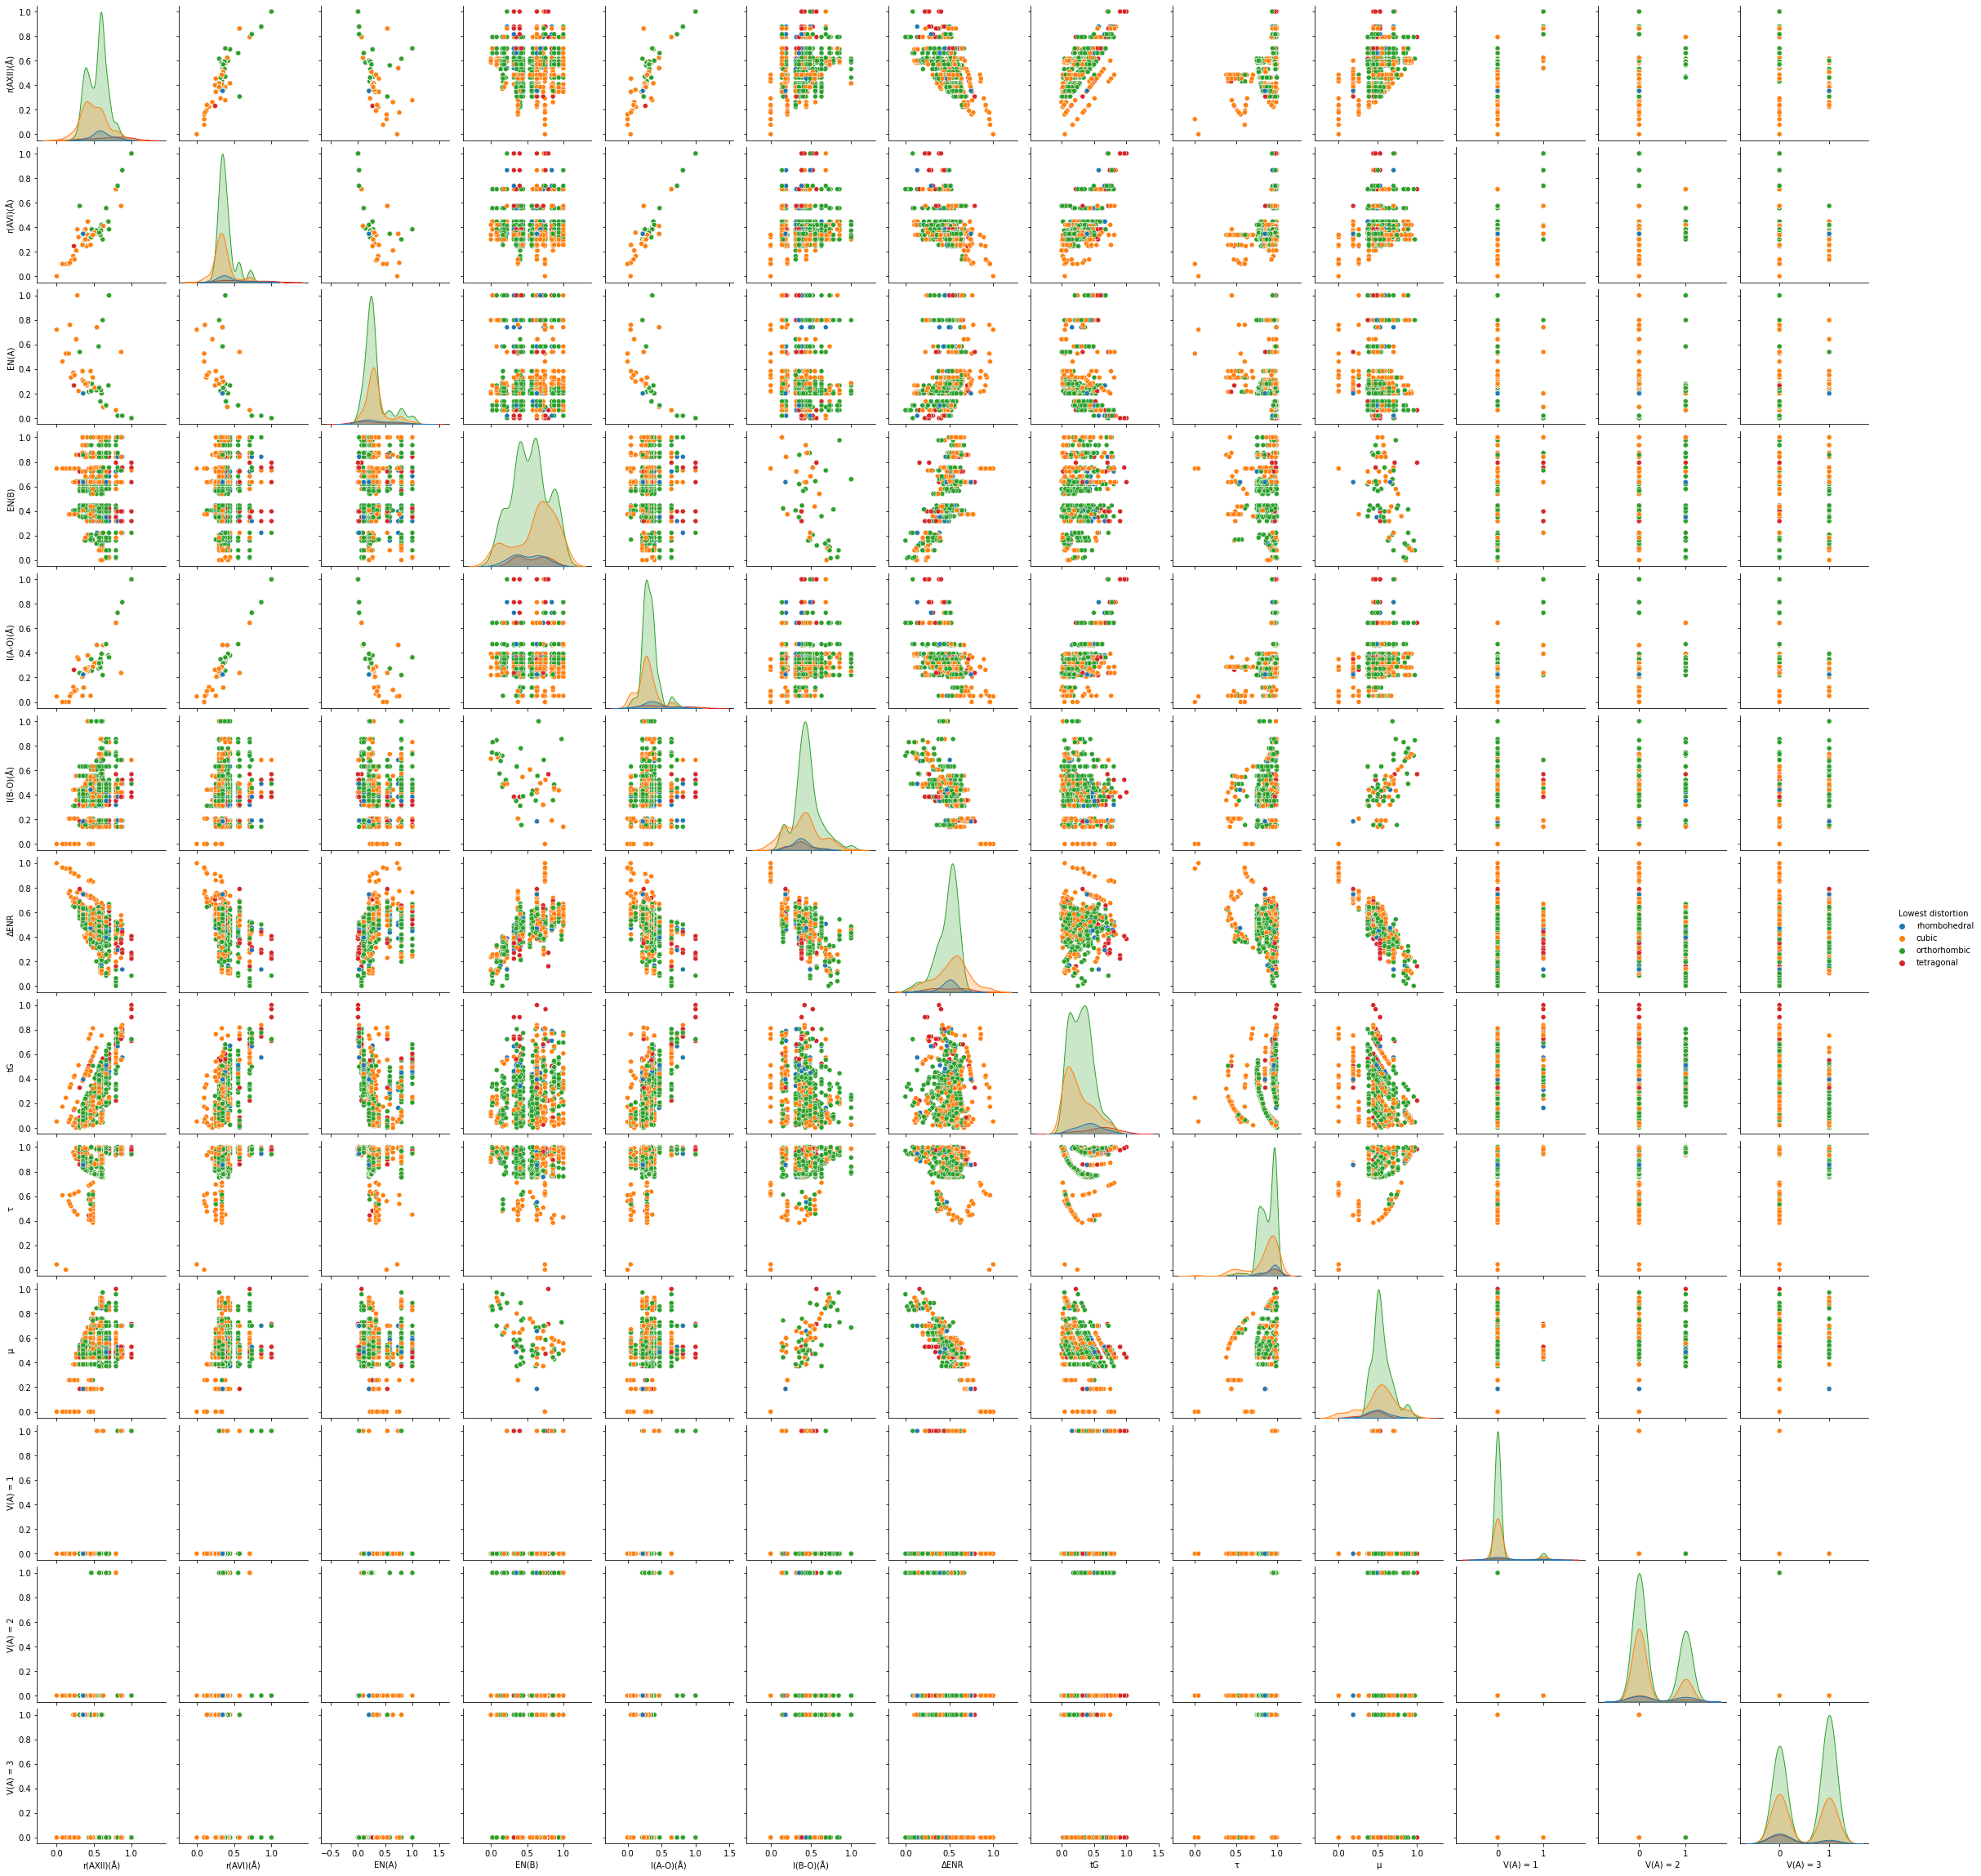

### Logistic Regression:

- Was not employed as it is used for binary outcomes. It could be used if we used a one-vs-all approach, however this approach is  quite resource intesive compared to the other alternatives used.

### k-nearest-neighbour (kNN):

- Hyperparameters: k values 
- k was looped between 1 and 5 (including 5).
- Comparing f1-scores, a k-value of 3 gave the heighest weighted average and hence was used.

### Support-Vector-Machine (SVM):

- Hyperparameter: C (ratio between regularisation and loss term), degree, gamma, and kernel
- implementing GridSearchCV() helped us find the best hyperparameters.

Initial Tried permutations of hyperparameters:
-C: range from 1,4 (included) with steps of 1 
-gamma: range from 1,9 (included) with steps of 1
-kernel: 'linear','rbf', 'poly', 'sigmoid'

Best parameters were found to be: {'C': 1, 'degree': 1, 'gamma': 2, 'kernel': 'rbf'}

### Random Forest Classifier (RFC):

- Hyperparameters: criterion, max_features, min_samples_leaf, n_estimators
- implementing GridSearchCV() helped us find the best hyperparameters.

Tried permutations of hyperparameters: 
- criterion: gini, entropy
- max_features: sqrt, 'auto'
- min_samples_leaf: range from 1,4 (included) with steps of 1.
- n_estimators: 1,20 (included) with steps of 2

Best parameters were found to be: criterion ='gini', max_features = 'auto', min_samples_leaf = 3, n_estimators = 11

**NOTE 1:** when testing permutations through GridSearchCV(), different intial ranges were tried. These were narrowed down to the best parameters. 

**NOTE 2:** implementing GridSearchCV() took more that 0.5 min to run (both SVM and RFC) 

**NOTE 3:** while finding the best hyperparameters, it was noted that looping or using GridSearchCV() had slightly changed best hyperparameters predicted each time. Common values determined through mulitple GridSearchCV() were used for the hyperparameter values in file 1.


# Classification Analysis: 

### Using Cross-validation to find the best classification technique:

Inferring from the average scores obtained during cross-validation, the top two classifications were SVC and RFC with the hyperparameters described above. However, through multiple iterations, it was observed that **SVM** was more higher by around 0.05 each iteration.

Average over multiple interation, 10-fold cross-validation:
- Average cross-validation score of kNN: 0.675
- Average cross-validation score of SVM: 0.706
- Average cross-validation score of RFC: 0.690

**Note 1:** The RFC score fluctuated around 0.1, thus has a large standard deviation.

### Effect of variable:

**Using confusion matrix for different crystal structures:**

- cubic: 
Most influential: v(A), μ, l(A-O)(Å)
Least influential: r(AXII)(Å), tG, 
- orthorhombic:
Most influential: r(AXII)(Å), tG, μ 
Least influential: r(AVI)(Å), l(B-O)(Å)
- tetragonal:
Most influential: ΔENR (However the influence was negative, i.e removal of this variable increased the score)
Least influential: r(AXII)(Å), tG, 
- rhombohedral:
Most influential: could not be determined due to a very small dataset used
Least influential: could not be determined due to a very small dataset used

**Using f1-score for overall model:**

Averaging the change in f1-scores when variables were removed for 10 iterations, it was seen that EN(A), r(AVI), EN(B) had the most influence on the overall predictibility of the model.

The variable that had the highest impact on the f1-score is tG. The f1-score drops to 0.467 when tG is removed from the dataset. This was also corroborated by the confusion matrix, whose accurately predicted values dropped the most when tG was dropped.


# Further Work:

- Oversampling can be performed in order to increase the accuracy of predictions for labels that have very little data (rhombohedral and tetragonal).

- Implementing the GridSearchCV cross validation capabilities into the predicted model in order to obtain more accurate results.

# In Conclusion:

- SVM best predicts the model.
- The most important variable is tG, which is verified by both the visual inspection of the confusion matrix as well as quantitative f1-score. The literature that we consulted also suggested that tG was the most important factor to determine the crystal structure of perovskites.

# Reference:

- "Crystal structure classification in ABO3 perovskites via machine learning" accessed on: 14/06